# Numerical Solutions of Ordinary Differential Equations

Though this course is mainly concerned with analyzing Ordinary Differential Equations (ODEs) from a theoretical perspective, today we will be talking about *numerical* solutions of ODEs. As you already saw, there are techniques to get explicit solutions to ODEs, but some ODEs which are simple to write do not have an explicit solution. As an example, an ODE like
$$x'(t) = \sin(t x(t))$$
does not have an analytical solution. However, as we will see, it is quite easy to write a program which yields a (hopefully good) approximation of the solution. 

Let's present the method directly in a generic case. We consider the Cauchy problem 

$$\begin{cases}
x'(t) = f(t, x(t)), \\
x(0) = b
\end{cases}$$

(note that we took a starting time of $t=0$ by simplicity) where we assume that we can evaluate the function $f$. 

## The explicit Euler method

We are concerned with this Cauchy problem, and we want to simulate it *forward* in time, that is, approximate $x(t)$ for $t \geq 0$. We already know $x(0) = b$, but then we want to compute what is happening in the future.

We fix a *step-size* $h > 0$. It will be our temporal resolution. Rather than trying to find $x(t)$ for all $t \geq 0$, we will only look for it at $x(n h)$ for $n \in \mathbb{N}$. Then the key idea is to approximate the derivative of $x$ by finite difference. Recall that 
$$x'(t) = \lim_{h \to 0} \frac{x(t+h) - x(t)}{h}.$$
Thus, if $h$ is small enough we expect
$$\frac{x(t+h) - x(t)}{h} \simeq x'(t) = f(t, x(t)).$$
We can reshuffle this equation into

$$\boxed{x(t+h) \simeq  x(t) + h f(t, x(t)). }$$

That is, knowing the value of $x$ at time $t$, we can find an approximation of the value at time $t+h$. 

The basic idea is to iterate this relation. Indeed from $x(0) = b$ we deduce $x(h) \simeq b + f(0, b)$. But then we can continue: $x(2h) \simeq x(h) + f(h, x(h))$, and so on and so forth. This leads to define a sequence $(y_n)_{n \geq 0}$ as follows:

$$\begin{cases}
y_0 = b, \\
y_{n+1} =  y_n + h f(nh, y_n),
\end{cases}$$

and we expect $y_n$ to be an approximation of $x(nh)$, with the approximation getting better as $h \to 0$.


### Our first example

Let's illustrate it with an example: the logistic equation:
$$ \begin{cases}
x' = x(1-x), \\
x(0) = b
\end{cases}
$$
We get the code below



In [1]:
# First some import 

from math import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Simulation of the logistic equation 

# Parameters

# Initial value
b = 0.1
# Final temporal horizon: run until t <= T
T = 5
# Time step
h = 0.1


# Initialize y and t
y = b
t = 0.
# Instanciate the list in which to store y_n and t
listY = []
listT = []

while t <= T:

    # Store the values
    listY.append(y)
    listT.append(t)
    
    # Iteration of the Euler scheme
    y = y + h * y*(1-y)
    t = t + h
    
    
# Convert the output in numpy array

arrayY = np.array(listY)
arrayT = np.array(listT)


We can plot the results. We can compare with the analytical solution, in this case

$$x(t) = \frac{b e^t}{1-b + b e^t}.$$

For the comparision, we can for instance compute the maximal value of $|y_n - x(nh)|$, where $y_n$ is given by the Euler scheme.


The maximal error is 0.012795629295983768.


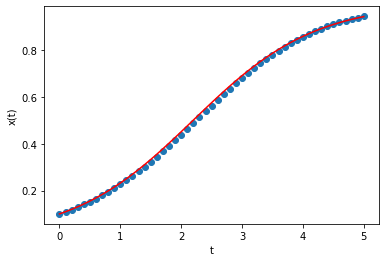

In [3]:
# Plotting the result

# Plotting the output
plt.scatter(arrayT, arrayY)

# Computing and plotting the true solution 
arrayTrueSolution = np.divide( b * np.exp(arrayT), 1 - b + b * np.exp(arrayT) )
plt.plot(arrayT, arrayTrueSolution, color = 'r')

print("The maximal error is " + str(np.max(np.abs(arrayTrueSolution - arrayY))) + ".")

# Legend 
plt.xlabel("t")
plt.ylabel("x(t)")

plt.show()




Let's encapsulate all of this in a python function. 


In [4]:
def explicitEuler(f,t0,b,T,h) :
    """Solve the equation with explicit Euler
    f function of two variables (time and x)
    t0  initial time
    b initial value for x(t0)
    T final temporal horizon
    h temporal step size
    
    Output
    arrayT numpy array with the values of T
    arrayX numpy array with the values of X
    """
    
    # Number of time steps
    N = floor((T - t0)/h + 1)
    
    arrayT = np.zeros(N)
    arrayX = np.zeros(N)
    
    # Initial conditions
    arrayT[0] = t0
    arrayX[0] = b
    
    for i in range(N-1):
        arrayT[i+1] = arrayT[i] + h
        arrayX[i+1] = arrayX[i] + h * f(arrayT[i], arrayX[i])
        
    return arrayT, arrayX
    

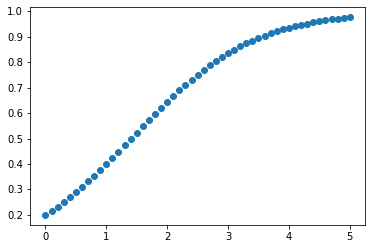

In [5]:
# Test with the logistic equation

def fLogistic(t,x):
    return x*(1.-x)

arrayT, arrayX = explicitEuler(fLogistic,0,0.2,5,0.1)

plt.scatter(arrayT, arrayX)
plt.show()

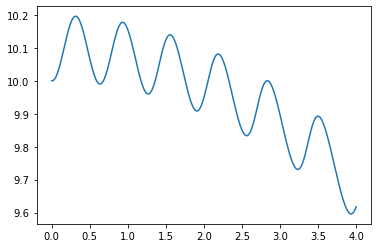

In [6]:
# Test with the equation x' = sin(tx) for which no explicit formula exists

def fUnsolvable(t,x):
    return sin(t*x)

# Temporal horizon
T = 4
# Initial condition
b = 10

arrayT, arrayX = explicitEuler(fUnsolvable,0,b,T,0.01)

plt.plot(arrayT, arrayX)
plt.show()

### An interesting case: blow up in finite time

Let's look at 
$$ \begin{cases}
x' = x^2, \\
x(0) = 1
\end{cases}
$$
whose explicit solution is $x(t) = 1/(1-t)$, it is only defined for $t < 1$. 


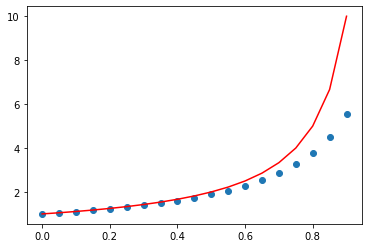

In [7]:
# What happens in case of blow up

def fBlowUp(t,x):
    return x**2

# Final time
T = 0.9
# Step size
h = 0.05

arrayT, arrayX = explicitEuler(fBlowUp,0,1,T,h)

# Comparing with the explicit solution 
# See where the blow up is
indexMax = np.argmax(arrayT >= 1. - 0.001)
if indexMax == 0:
    indexMax = len(arrayT)
# Compute the exact solution up to the blow up
arrayXExact = np.maximum( 0., np.divide(1,1 - arrayT[:indexMax])  )


plt.scatter(arrayT, arrayX)
plt.plot(arrayT[:indexMax], arrayXExact, color = 'r')
plt.show()

### An example of an empirical study of an ODE

Let's look at 
$$
\begin{cases}
x'(t) = x^2(t) - t, \\
x(0) = b
\end{cases}
$$

Studying it numerically, we can clearly distinguish two behaviors depending on the value of $b$. If $b < b^* \simeq 0.728$, then there is asymptotic convergence to a solution tending to $- \infty$ linearly, if $b > b^*$ there seems to be blow up in finite time. 


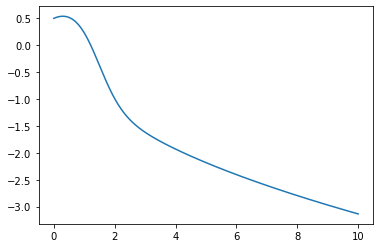

In [8]:
# Distinguishing empirically between two behaviors

def fEmpirical(t,x):
    return x**2 - t

b = 0.5

arrayT, arrayX = explicitEuler(fEmpirical,0,b,10,0.01)


plt.plot(arrayT, arrayX)
plt.show()

### Theoretical guarantees

We mention the following result which is not so easy to prove and which belongs to the realm of numerical analysis.

**Theorem** *Take $f$ is a $C^1$ function over an open set $U \subset \mathbb{R} \times \mathbb{R}$ and valued in $\mathbb{R}$. Assume that the Cauchy problem*

$$\begin{cases}
x'(t) = f(t,x(t)), \\
x(0) =b
\end{cases}$$

*has a unique solution $x(t)$ for $t \in [0,T]$. For $h > 0$, define a sequence $(y^{(h)}_n)_{n \geq 0}$ following the Euler scheme, that is:*

$$\begin{cases}
y^{(h)}_0 = b, \\
y^{(h)}_{n+1} =  y^{(h)}_n + h f(nh, y^{(h)}_n),
\end{cases}$$

*as long as $nh \leq T$.*

*Then we can conclude*
$$ \lim_{h \to 0} \left( \sup_{\{ n \ : \ nh \leq T \}} | y^{(h)}_n - x(nh)  | \right) = 0 $$

This result says that errors do not snowball in an uncontrolled way and that, for a fixed time horizon, we indeed recover the solution given by the theory. 

However it does not mean that the explicit Euler method is the end of the game.
 * One may be required to take $h$ so small that computations become too long. One wants to quantify the speed at which the convergence occur, and design methods which converge faster to the true solutions. 
 * One may want to study the long time behavior. For instance, in the case of the logistic equation: is it true that our discrete solutions converge to $1$ if we start from an initial condition in $(0,1]$? In this case it may be interesting to design method which also preserve the structure of the system (for instance, preserve the mechanical energy for a physical system). 


## Higher order methods


For this discussion, to simplify the notations we concentrate on autonomous systems $x'(t) = f(x(t))$, that is, $f$ does not depend on $t$. However, what is written below can be extended to the case $f = f(t,x)$.

If we look at the approximation we used to define the Euler method: $x(t+h) \simeq  x(t) + h f(x(t))$, we see that it bloils down to a Taylor expansion of order $1$: namely, assuming that $f$ is of class $C^2$.

$$x(t+h) = x(t) + h x'(t) + O(h^2). $$

Thus the so-called *local truncation error* is of order $h^2$. However, the *global* error is usally of order $1$ because the local errors accumulate: we have typically $T/h$ time steps, each with an error of $h^2$, eventually creating an error of $h$. That is, by dividing $h$ by $2$, we expect at most the global error to be divided by $2$. There are many methods to decrease the truncation error ([Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), [Adams–Bashforth](https://en.wikipedia.org/wiki/Linear_multistep_method), etc.). We will present here only one, namely the Adams-Bashforth of order $2$. We start with our expansion on top, but we push one more order:

$$x(t+h) = x(t) + h x'(t) + \frac{h^2}{2} x''(t) + O(h^3). $$

Next we already know that $x'(t) = f(x(t))$, and for $x''(t)$ we use a finite difference formula:

$$ x''(t) = [f(x(t))]' \simeq \frac{f(x(t)) - f(x(t-h))}{h}, $$

where here we go backward in time to keep an explicit scheme. Thus plugging back in the Taylor expansion of $x$ we obtain 

$$x(t+h) = x(t) + h f(x(t)) + \frac{h^2}{2} \left( \frac{f(x(t)) - f(x(t-h))}{h} + O(h) \right) + O(h^3), $$

which after simplifications become

$$\boxed{x(t+h) = x(t) + \frac{3h}{2}  f(x(t)) - \frac{h}{2}  f(x(t-h)) + O(h^3).} $$

Now the local error is of order $3$, thus we expect the global error to be of order $2$: dividing $h$ by $2$, we expect at most the global error to be divided by $4$. Note however that now we need the two previous values $x(t)$ and $x(t-h)$ to compute $x(t+h)$. This leads to define the following sequence $(y_n)_{n \geq 0}$:

$$\begin{cases}
\text{Initialize } y_0, y_1  \\
y_{n+1} =  y_n + \frac{3h}{2} f(y_n) - \frac{h}{2} f(y_{n-1}),
\end{cases}$$

and we expect $y_n$ to be an approximation of $x(nh)$, better than the one given by explicit Euler. Here to initialize $y_0, y_1$ we proceed as follows: of course $y_0 = b$, and for $y_1$ we use the explicit Euler scheme, that is, $y_1 = y_0 + h f(y_0)$.


The maximal error is 0.0009615735591319563.


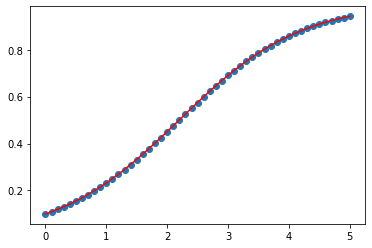

In [9]:
# Let's illustrate this on the logistic equation 

# Redefine flogistic to be independent of t
def fLogisticAutonomous(x):
    return x*(1-x)

# Fix the parameters 

# Initial value
b = 0.1
# Final temporal horizon: run until t <= T
T = 5
# Time step
h = 0.1


# Number of time steps
N = floor(T/h + 1)

arrayABT = np.zeros(N)
arrayABX = np.zeros(N)



# Solve equation with Adam Bashforth

arrayABT = np.zeros(N)
arrayABX = np.zeros(N)
    
# Initial conditions
arrayABT[0] = 0.
arrayABT[1] = h
arrayABX[0] = b
# To initialize y_1 we use an explicit Euler scheme
arrayABX[1] = arrayABX[0] + h*fLogisticAutonomous(arrayABX[0])


for i in range(1,N-1):
    arrayABT[i+1] = arrayABT[i] + h
    arrayABX[i+1] = arrayABX[i] + 1.5*h * fLogisticAutonomous(arrayABX[i]) -0.5*h*fLogisticAutonomous(arrayABX[i-1])


    
# Function to compute the explicit solutuion

def solutionLogistic(t) :
    return np.divide( b * np.exp(t), 1 - b + b * np.exp(t) )    
    
    
# Compute the global error    
print("The maximal error is " + str(np.max(solutionLogistic(arrayABT) - arrayABX)) + ".")    


plt.scatter(arrayABT, arrayABX)
plt.plot(arrayABT,solutionLogistic(arrayABT), color = 'r')
plt.show()    
    

## Stability issues and the implicit Euler method

### Stability issues

To discuss stability, let us consider one of the simplest ODE, the Malthus equation
$$x' = - r x$$
where $r > 0$. The solution is $x(t) = x(0) \exp(- rt)$: a smooth and fast decay towards $0$. 


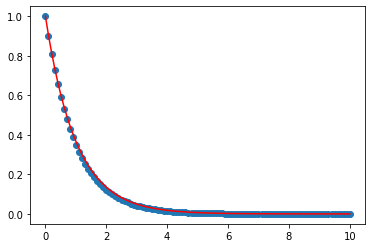

In [10]:
# Explicit Euler with an exponential decay
# We take an initial condition of x(0) = 1

r = 1.
h = 0.1

def fExp(t,x):
    return -r*x

arrayT, arrayX = explicitEuler(fExp,0,1,10,h)

# Comparing with the explicit solution 
arrayXExact = np.exp(- r*arrayT)


plt.scatter(arrayT, arrayX)
plt.plot(arrayT, arrayXExact, color = 'r')
plt.show()

To understand what is happenning, let us write explicitly the iterate of the discrete sequence. In this case, for some $h > 0$ it reads
$$\begin{cases}
y_0 = 1, \\
y_{n+1} = y_n - rh y_n = (1-rh) y_n
\end{cases}$$
which gives us a geometric sequence. The solution here is given by 
$$y_n = (1-rh)^n$$

**As a consequence, the sequence $(y_n)_{n \geq 1}$ diverges if $|1-rh| > 1$ while it converges if $|1-rh| < 1$**. In particular, in the case $r > 0$, it means that if $h > 2/r$ (that is, $h$ is not small enough), then the asymptotic behavior of the sequence $(y_n)_{n \geq 1}$ differs drastically from the one of the solution $x(t)$. 




### The implict Euler method

When we derived the explicit Euler method, we relied on 

$$x'(t) \simeq \frac{x(t+h) - x(t)}{h}.$$

However, note that it also work "the other way around", that is, 

$$x'(t) \simeq \frac{x(t) - x(t-h)}{h}.$$

Using again that $x'(t) = f(t,x(t))$ is given by the equation, we reshuffle to write 

$$x(t) \simeq  x(t-h) + h f(t, x(t)) $$

and, doing the subsitution $t$ into $t+h$, we find

$$\boxed{x(t+h) \simeq  x(t) + h f(t+h, x(t+h))}.$$

This is almost like the explicit Euler method, except now $x(t+h)$ is also on the other side. So at every step, one needs to solve an equation to find $x(t+h)$. Specifcally, the method reads: find a sequence $(y_n)_{n \geq 0}$ satisfying:

$$\begin{cases}
y_0 = b, \\
y_{n+1} =  y_n + h f((n+1)h, y_{n+1}),
\end{cases}$$

and we expect $y_n$ to be an approximation of $x(nh)$, with the approximation getting better as $h \to 0$. The caveat is that at each iteration on needs to solve an equation, for which there may be no analytical solutions. However, it may be possible to use some numerical method so solve approximatively this equation. 

Why go through all this additional trouble? Because generically an implicit Euler method is much more stable than the explicit one. 




### Example on our exponential decay

Let's work through our equation $x' = - rx$. Now the implicit Euler method reads

$$\begin{cases}
y_0 = 1, \\
y_{n+1} = y_n - rh y_{n+1}, 
\end{cases}$$

and the second equation yields $y_{n+1} = y_n/(1+rh)$, thus

$$y_n = \frac{1}{(1+rh)^n}.$$

**As a consequence, for any $h,r > 0$ the sequence $(y_n)_{n \geq 0}$ converges to $0$.**



In [11]:
# Simulation of the exponential equation via implicit Euler

# Parameters

# Parameter r
r = 1.
# Final temporal horizon: run until t <= T
T = 10
# Time step
h = 0.1

# Total number of steps
N = floor(T/h + 1)

arrayT = np.linspace(0, (N-1)*h ,N)
# Here for simplicity I use directly the formula derived theoretically for the solution of implicit Euler
arrayY = np.power( 1/(1+r*h), np.arange(N) )
# Also the explicit solution 
arrayXExact = np.exp(- r*arrayT)



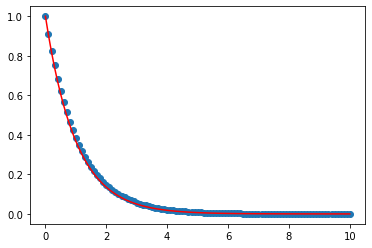

In [12]:
# Plotting of the solutions 

plt.scatter(arrayT, arrayY)
plt.plot(arrayT, arrayXExact, color = 'r')
plt.show()

## One last example: the harmonic oscillator

We consider the system of equations

$$
\begin{cases}
x'(t) = y(t), \\
y'(t) = -x(t), \\
x(0) = 1, \, y(0) = 0.
\end{cases}
$$

whose unknow is $(x,y) = (x(t), y(t))$ a vector valued function with two coordinates. Equivalently, here we have two unknowns, that is, two functions $x$ and $y$ to find. Substituing in the equation $x'' = -x$, and one can find the solution

$$
\begin{cases}
x(t) = \cos(t), \\
y(t) = -\sin(t).
\end{cases}
$$

This is the harmonic oscillator, that we represent as a function of $t$ but also we can plot the curve in the $x,y$ plane. Note that $\frac{1}{2}(x(t)^2+y(t)^2)$, which is the mechanic energy, does not depend on time. In the $(x,y)$ plane, trajectories are located a circle.



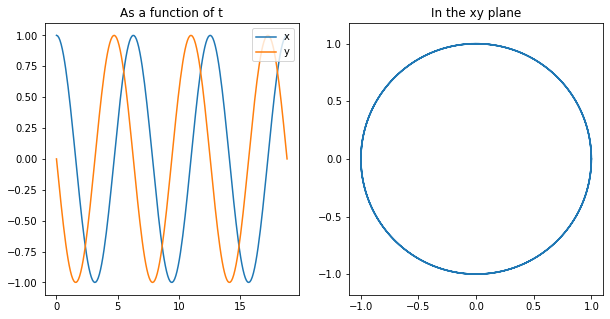

In [13]:
# Plot the graph of the explicit solution to the harmonic oscillator

# Final time 
T = 6 * pi 

# Grid in time
arrayT = np.linspace(0,T,200)

# Exact solution 
arrayX = np.cos(arrayT)
arrayY = -np.sin(arrayT)

# To do the plots, we encapsulate everything in a function to reuse it later

def plotOscillator(t,x,y) :
    
    figure, axis = plt.subplots(1,2, figsize=(10, 5))
    
    axis[0].plot(t, x, label = 'x')
    axis[0].plot(t, y, label = 'y')
    axis[0].legend(loc = 1)
    axis[0].set_title("As a function of t")
    
    axis[1].plot(x, y)
    axis[1].axis('equal')
    axis[1].set_title("In the xy plane")
    
    plt.show()

plotOscillator(arrayT,arrayX,arrayY)



### With an explicit method

Even though it's a system we can still use an explicit Euler method to solve it. Recall that for a scaler equation we were looking at

$$\begin{cases}
x_0 = b, \\
x_{n+1} =  x_n + h f(x_n).
\end{cases}$$

Now we have two sequences $(x_n)_{n \geq 0}$ and $(y_n)_{n \geq 0}$, and the function $f : (x,y) \to (y,-x)$ becomes valued in $\mathbb{R}^2$. The iteration becomes

$$\begin{cases}
x_0 = 1, \quad y_0 = 0 \\
x_{n+1} =  x_n + h y_n, \\
y_{n+1} =  y_n - h x_n.
\end{cases}$$

Its implementation is almost as easy as the one for a scalar equation.

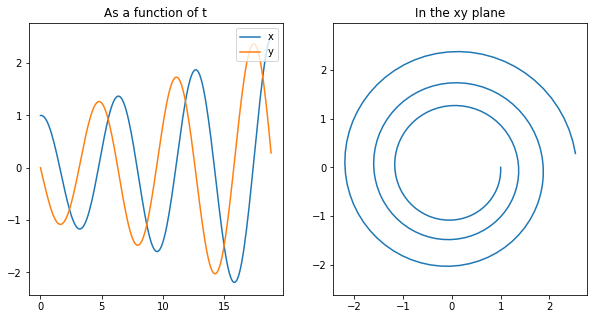

In [14]:
# Simulation of the harmonic oscillator with an explicit method 

# Parameters

# Final temporal horizon: run until t <= T
T = 6*pi
# Time step
h = 0.1


# Number of time steps
N = floor(T/h + 1)

arrayT = np.zeros(N)
arrayX = np.zeros(N)
arrayY = np.zeros(N)

# Initial conditions
arrayT[0] = 0.
arrayX[0] = 1.
arrayY[0] = 0.

# Explicit Euler loop
for i in range(N-1):
    arrayT[i+1] = arrayT[i] + h
    arrayX[i+1] = arrayX[i] + h * arrayY[i]
    arrayY[i+1] = arrayY[i] - h * arrayX[i]

# Plot the results   

plotOscillator(arrayT,arrayX,arrayY)
    

**Even for very small values of $h$, we do not reproduce the right behavior in the long run: the discrete trajectory diverges.**

Whereas the continuous system is energy preserving, here the energy is increasing.

### With an implicit method

We can still write an implicit Euler. For a given $h$ we have to solve the following system to move forward of one time step.

$$
\begin{cases}
x_{n+1} = x_n + h y_{n+1}, \\
y_{n+1} = y_n - h x_{n+1}
\end{cases}
\qquad \Leftrightarrow \qquad
\begin{cases}
x_{n+1} - h y_{n+1} = x_n, \\
h x_{n+1} + y_{n+1} = y_n.
\end{cases}
$$

This is a linear system whose unknows are $(x_{n+1}, y_{n+1})$ while $(x_n,y_n)$ are given. We can solve it explicitly to obtain

$$
\begin{cases}
x_{n+1} = \frac{x_n + h y_{n}}{1+h^2}, \\
y_{n+1} = \frac{y_n - h x_{n+1}}{1+h^2}.
\end{cases}
$$

This is almost the explicit Euler, but for the factor $1/(1+h^2)$. We have only to modify slightly the code to look at what is happenning.



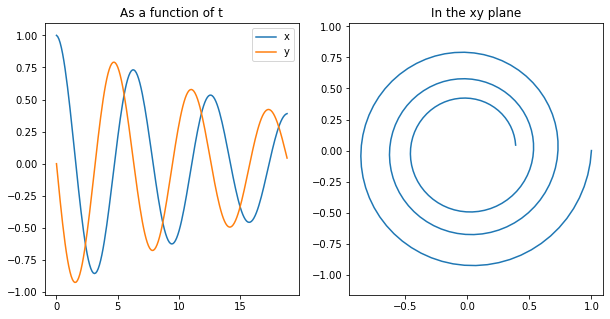

In [15]:
# Simulation of the harmonic oscillator with an implicit method 

# Parameters

# Final temporal horizon: run until t <= T
T = 6*pi
# Time step
h = 0.1


# Number of time steps
N = floor(T/h + 1)

arrayT = np.zeros(N)
arrayX = np.zeros(N)
arrayY = np.zeros(N)

# Initial conditions
arrayT[0] = 0.
arrayX[0] = 1.
arrayY[0] = 0.

# Implicit Euler loop
for i in range(N-1):
    arrayT[i+1] = arrayT[i] + h
    arrayX[i+1] = (arrayX[i] + h * arrayY[i])/(1+h**2)
    arrayY[i+1] = (arrayY[i] - h * arrayX[i])/(1+h**2)

# Plot the results   

plotOscillator(arrayT,arrayX,arrayY)

**Even for very small values of $h$, we do not reproduce the right behavior in the long run: the discrete trajectory converges to $(0,0)$.**

Whereas the continuous system is energy preserving, here the energy is decreasing: there is numerical "dissipation".

### With a symplectic integrator

In the case of the harmonic oscillator there is a possible fix. Recall that explicit Euler reads:

$$
\begin{cases}
x_{n+1} = x_n + h y_{n}, \\
y_{n+1} = y_n - h x_{n}.
\end{cases}
$$

Here we can keep the update for $y$ to be the same:
$$y_{n+1} = y_n - h x_{n}$$
but for the update of $x$, we use the new value that we compute of $y$:
$$x_{n+1} = x_n + h y_{n+1}.$$
It is still an explicit method and very easy to code if we have the code for explicit Euler. 



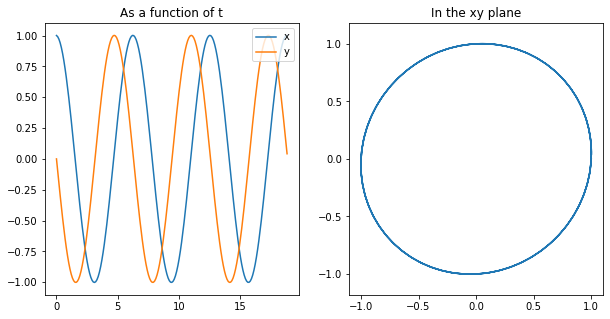

In [17]:
# Simulation of the harmonic oscillator with a symplectic integrator 

# Parameters

# Final temporal horizon: run until t <= T
T = 6*pi
# Time step
h = 0.1


# Number of time steps
N = floor(T/h + 1)

arrayT = np.zeros(N)
arrayX = np.zeros(N)
arrayY = np.zeros(N)

# Initial conditions
arrayT[0] = 0.
arrayX[0] = 1.
arrayY[0] = 0.

# Symplectic integrator loop
for i in range(N-1):
    arrayT[i+1] = arrayT[i] + h
    arrayY[i+1] = arrayY[i] - h * arrayX[i]
    # Only the line below has been modified compared to explicit Euler
    arrayX[i+1] = arrayX[i] + h * arrayY[i+1]
   

# Plot the results   

plotOscillator(arrayT,arrayX,arrayY)

**Even with a a reasonably large $h$ we have trajectories which oscillate!**

The reason is that a discrete energy is preserved: the quantity 
$$
E_h(x,y) = \frac{x^2}{2} + \frac{y^2}{2} - \frac{1}{2} h xy
$$
is preserved along the trajectory, that is $E_h(x_n,y_n)$ does not depend on $n$. Indeed,

$$
E_h(x_{n+1},y_{n+1}) = \frac{x_{n+1}^2 +  y_{n+1}^2}{2} - \frac{1}{2} h x_{n+1}y_{n+1} = \frac{(x_n + h y_{n+1})^2 +  (y_n - h x_{n})^2 }{2} - \frac{1}{2} h (x_n + h y_{n+1})y_{n+1} 
$$

So when we expand:

$$ 
E_h(x_{n+1},y_{n+1}) = \frac{x_n^2}{2} + h x_n y_{n+1} + \frac{h^2 y_{n+1}^2}{2} +  \frac{y_n^2}{2} - h x_n y_n + \frac{h^2 x_n^2}{2} - \frac{h x_{n} y_{n+1}}{2} - \frac{h^2 y_{n+1}^2}{2}
$$
and grouping the terms together we get
$$
E_h(x_{n+1},y_{n+1}) = E_h(x_n,y_n) + \frac{h x_n y_{n+1}}{2} - \frac{h x_n y_n}{2} + \frac{h^2 x_n^2}{2}
$$
and we can conclude $E_h(x_{n+1},y_{n+1}) = E_h(x_n,y_n)$ as
$$
\frac{h x_n y_{n+1}}{2} - \frac{h x_n y_n}{2} + \frac{h^2 x_n^2}{2} = \frac{x_n h}{2} (y_{n+1} - y_n + h x_n) = 0. 
$$
As long as the energy $E_h$ defines a quadratic positive form, the trajectories belong to a closed orbit, actually an ellipse. This happens as long as $h \leq 2$. 

Here it may seen like a pure algebraic trick. To understand one what is happenning, one would need to study the theory of Newtonian mechanics in its modern formalism (that is, *Lagrangian* and *Hamiltonian* mechanic) to understand the geometric structure, and then how a symplectic integrator is the natural "structure preserving" method. 
